In [1]:
import pandas as pd
df = pd.read_csv('z-scored.txt')
print(df.shape)
df.head()

(3701, 19)


,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,net%,ny/a,ypc,td:touch,to:touch
0,Joe Flacco,2013,24,35,251,1,0,2.0,14.0,4,7,0,1,0.124003,0.555481,-0.095406,-0.278591,-0.622637,-0.318536
1,Ben Roethlisberger,2013,28,44,257,2,0,0.0,0.0,1,11,0,0,0.497263,0.440179,-0.371454,1.983181,-0.029683,-1.058624
2,Tony Romo,2013,23,32,225,1,0,2.0,17.0,1,-1,0,1,-0.435888,0.816605,-0.236125,-0.951009,-0.499009,-0.191663
3,Matthew Stafford,2013,22,35,330,3,2,1.0,10.0,1,8,0,1,-0.249258,0.203170,1.119054,1.249634,1.053573,1.401670
4,Tom Brady,2013,34,50,344,3,0,3.0,20.0,2,0,0,2,1.430413,0.488475,-0.238296,-0.706494,0.268980,0.044780


In [3]:
# prepare to split into train/test matrices
from sklearn.model_selection import train_test_split

y_col = 'player'
labels = df[y_col].unique()
X_cols = ['touches', 'net%', 'ny/a', 'ypc', 'td:touch', 'to:touch']

labels

array(['Joe Flacco', 'Ben Roethlisberger', 'Tony Romo',
       'Matthew Stafford', 'Tom Brady', 'Ryan Fitzpatrick', 'Eli Manning',
       'Peyton Manning', 'Cam Newton', 'Carson Palmer', 'Philip Rivers',
       'Alex Smith', 'Drew Brees', 'Matt Ryan', 'Matt Cassel',
       'Andy Dalton', 'Matt Schaub', 'Russell Wilson', 'Jay Cutler',
       'Matt Hasselbeck', 'Michael Vick', 'Brett Favre', 'Aaron Rodgers'],
      dtype=object)

## How We'll Do Logistic Regression

The idea is for one of the players of the game to assemble a handful of these logistic regression classifiers at a time. So even though sklearn's implementation can do one vs all out of the box, we'll be reinventing the wheel a bit

In [5]:
from sklearn.linear_model import LogisticRegression

def wrangle(df, p, sel):
    df = df.copy()
    df['player'] = (df['player'] == p).astype(int)
    train, test = train_test_split(df,
                                   test_size=0.2,
                                   stratify=df['player'],
                                   random_state=143)
    return train[sel], test[sel]

models = {}
for p in labels:
    X_train, X_test = wrangle(df, p, X_cols)
    y_train, y_test = wrangle(df, p, y_col)
    model = LogisticRegression(
        class_weight='balanced',
        n_jobs=-1,
        random_state=143
    )
    model.fit(X_train, y_train)
    models[p] = [model, model.score(X_test, y_test)]

for k in models:
    print(k, models[k][1])

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

Joe Flacco 0.5681511470985156
Ben Roethlisberger 0.5074224021592443
Tony Romo 0.5951417004048583
Matthew Stafford 0.5924426450742241
Tom Brady 0.581646423751687
Ryan Fitzpatrick 0.6734143049932524
Eli Manning 0.5114709851551957
Peyton Manning 0.6612685560053981
Cam Newton 0.699055330634278
Carson Palmer 0.5303643724696356
Philip Rivers 0.5425101214574899
Alex Smith 0.6626180836707153
Drew Brees 0.6423751686909581
Matt Ryan 0.5330634278002699
Matt Cassel 0.7273954116059379
Andy Dalton 0.5668016194331984
Matt Schaub 0.6410256410256411
Russell Wilson 0.689608636977058
Jay Cutler 0.6653171390013495
Matt Hasselbeck 0.5789473684210527
Michael Vick 0.7921727395411606
Brett Favre 0.5721997300944669
Aaron Rodgers 0.6828609986504723


/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


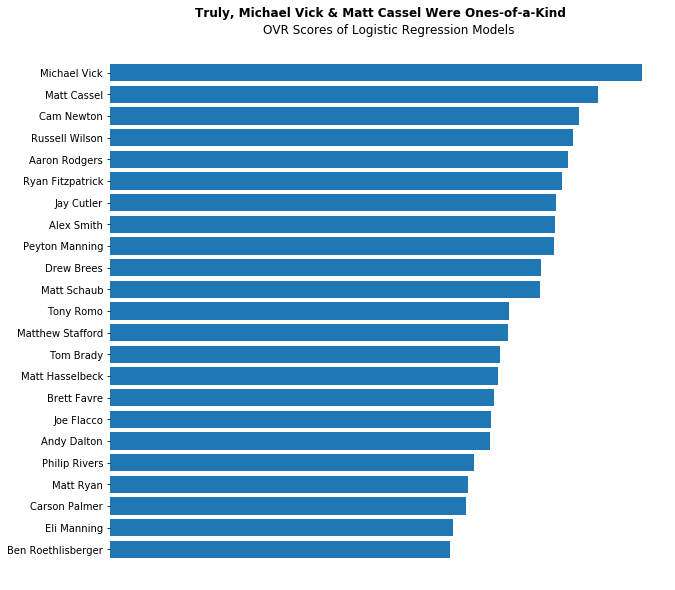

In [23]:
# visualize skill of each logistic regressor
import matplotlib.pyplot as plt
smods = [(p, models[p][1]) for p in models]
smods.sort(key=lambda x: x[1])
x = [_[0] for _ in smods]
y = [_[1] for _ in smods]
plt.figure(figsize=(10,10))
plt.suptitle('Truly, Michael Vick & Matt Cassel Were Ones-of-a-Kind',
             fontweight='bold',
             y=0.925)
plt.title('OVR Scores of Logistic Regression Models')
plt.barh(x, y)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([], visible=False)
plt.show()

In [22]:
# save each logistic regressor
import pickle
for p in models:
    fn = p.replace(' ', '')
    pickle.dump(models[p][0], open(f'{fn}-lr.pkl', 'wb'))